### [Plotting](https://gist.github.com/gizmaa/7214002#basicplots)


In [1]:
# import Pkg
# Pkg.add("PyPlot")

In [7]:
using PyPlot
pl = PyPlot;

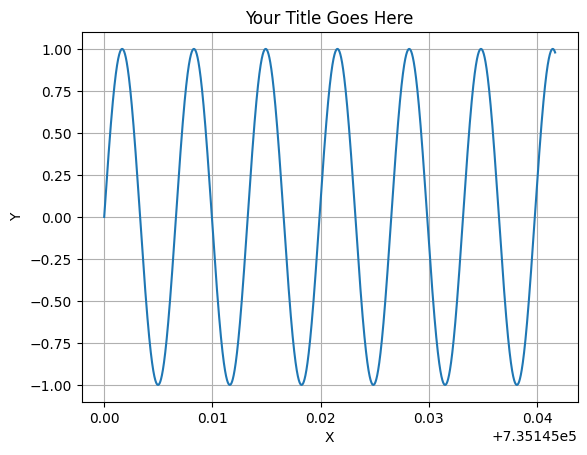

In [8]:
p = plot(x,y)
xlabel("X")
ylabel("Y")
pl.title("Your Title Goes Here")
grid("on")

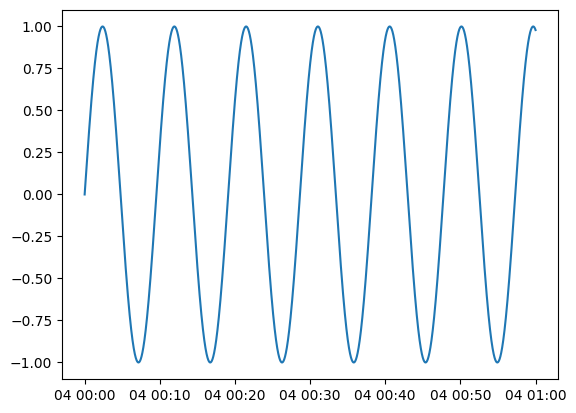

In [10]:
p = plot_date(x,y,linestyle="-",marker="None",label="Base Plot"); # Basic line plot

In [3]:
using PyPlot
using Dates

ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

######################################
#  Generate an hour of data at 10Hz  #
######################################
x = collect(DateTime(2013,10,4):Dates.Millisecond(100):DateTime(2013,10,4,1)) # Generate time array
x = Dates.value.(x)/1000/60/60/24 # Convert time from milliseconds from day 0 to days from day 0
y = sin.(2*pi*collect(0:2*pi/(length(x)+1):2*pi-(2*pi/length(x))))
dx = maximum(x) - minimum(x)
dy = maximum(y) - minimum(y)

y2 = 30.0*(1.0 .+ sin.(2.0*pi*collect(pi:2.0*pi/length(x):3*pi-(2*pi/length(x))))) .- 10.0
x2 = collect(minimum(x):dx/20:maximum(x))
y2 = 10rand(21) .- 3
x3 = collect(minimum(x):dx/20:maximum(x))
y3 = 10rand(21) .- 3;

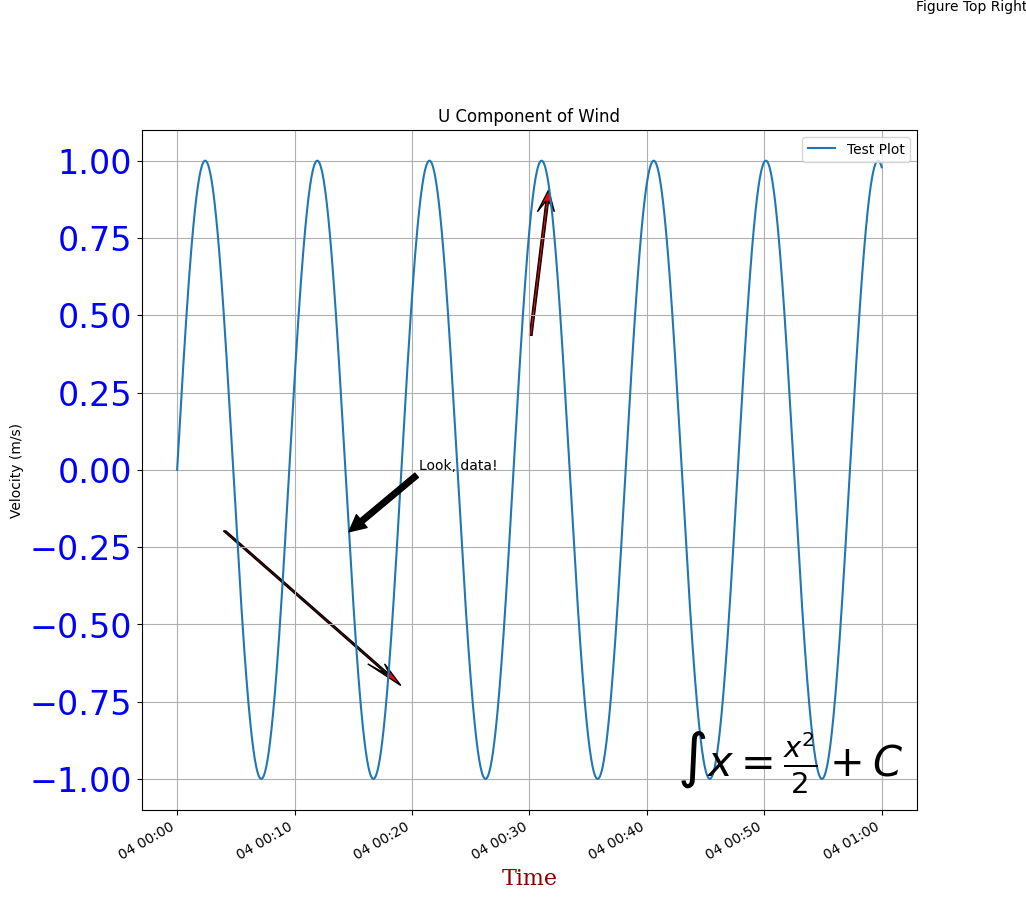

In [11]:
fig = figure("pyplot_annotation",figsize=(10,10)) # Create a figure and save its handle
#ax = axes([0.12;0.2;0.75;0.7])
ax = gca()
p = plot_date(x,y,linestyle="-",marker="None",label="Test Plot") # Plot a basic line
axis("tight") # Fit the axis tightly to the plot
PyPlot.title("U Component of Wind")
grid("on")
legend(loc="upper right",fancybox="true") # Create a legend of all the existing plots using their labels as names

##################
#  Text Styling  #
##################
font1 = Dict("family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>16)
xlabel("Time",fontdict=font1)
ylabel("Velocity (m/s)")
setp(ax.get_yticklabels(),fontsize=24,color="blue") # Y Axis font formatting

#################
#  Arrow Tests  #
#################
# This arrows orient toward the x-axis, the more horizontal they are the more skewed they look
arrow(x[convert(Int64,floor(length(x)/2))],
    0.4,
    0.0009,
    0.4,
    head_width=0.001,
    width=0.00015,
    head_length=0.07,
    overhang=0.5,
    head_starts_at_zero="true",
    facecolor="red")
arrow(x[convert(Int64,floor(0.3length(x)))]-0.25dx,
    y[convert(Int64,floor(0.3length(y)))]+0.25dy,
    0.25dx,
    -0.25dy,
    head_width=0.001,
    width=0.00015,
    head_length=0.07,
    overhang=0.5,
    head_starts_at_zero="true",
    facecolor="red",
    length_includes_head="true")

###########################
#  Text Annotation Tests  #
###########################
annotate("Look, data!",
    xy=[x[convert(Int64,floor(length(x)/4.1))];y[convert(Int64,floor(length(y)/4.1))]],
    xytext=[x[convert(Int64,floor(length(x)/4.1))]+0.1dx;y[convert(Int64,floor(length(y)/4.1))]+0.1dy],
    xycoords="data",
    arrowprops=Dict("facecolor"=>"black")) # Julia dictionary objects are automatically converted to Python object when they pass into a PyPlot function
annotate("Figure Top Right",
    xy=[1;1],
    xycoords="figure fraction",
    xytext=[0,0],
    textcoords="offset points",
    ha="right",
    va="top")
annotate(L"$\int x = \frac{x^2}{2} + C$",
    xy=[1;0],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
fig.canvas.draw() # Update the figure
# gcf() # Needed for IJulia to plot inline

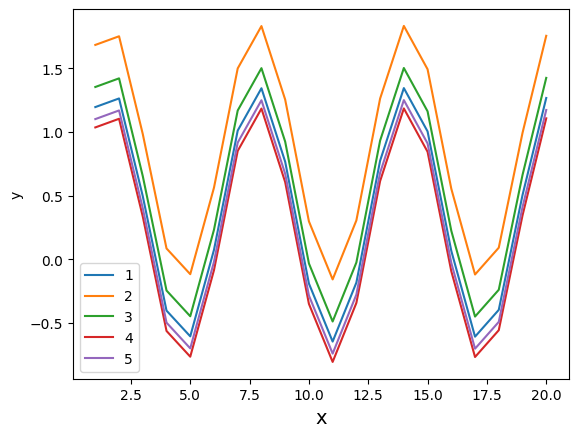

In [38]:
pl.figure()
x = collect(1:20)
y = sin.(x);
for i=1:5
    p = rand()
    pl.plot(x, sin.(x) .+ p, label=i)
end
pl.xlabel("x", fontsize=14)
pl.ylabel("y")
pl.legend();

In [31]:
string(1)

"1"

In [48]:
# import PyCall
# np = PyCall.pyimport("numpy")
# x = np.random.rand(1000);

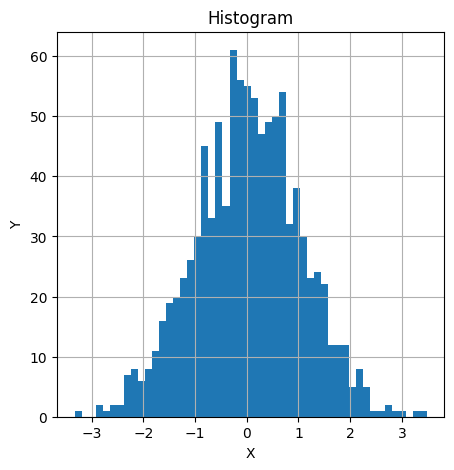

In [56]:
using PyPlot
x = randn(1000)
nbins=50

fig = figure("pyplot_histogram",figsize=(5,5)) # Not strictly required
ax = PyPlot.axes() # Not strictly required
h = plt.hist(x,nbins) # Histogram
grid("on")
xlabel("X")
ylabel("Y")
title("Histogram");

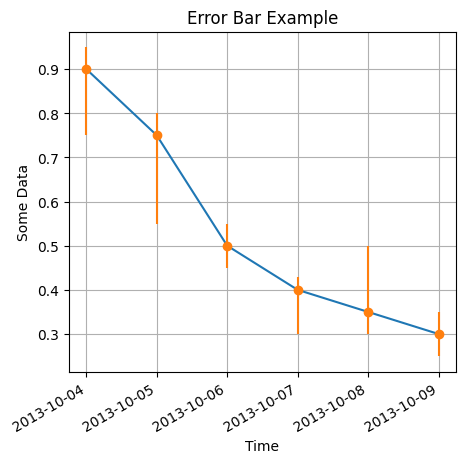

From 2013-10-04T00:00:00 to 2013-10-09T00:00:00


In [57]:
using PyPlot

#  Generate a few points of data  #
x = collect(DateTime(2013,10,4):Dates.Day(1):DateTime(2013,10,9))
y = [0.9;0.75;0.5;0.4;0.35;0.3]
uppererror = [0.05 0.05 0.05 0.03 0.15 0.05;]
lowererror = [0.15 0.2 0.05 0.1 0.05 0.05;]
errs = [lowererror;uppererror]

println("From " * string(x[1]) * " to " * string(x[end]))

x = Dates.value.(x)/1000/60/60/24 # Convert time from milliseconds from day 0 to days from day 0

#  Plot  #
fig = figure("pyplot_errorbar",figsize=(5,5)) # Create a new figure
p = plot_date(x,y,linestyle="-",marker="None",label="Base Plot") # Basic line plot
pe = errorbar(x,y,yerr=errs,fmt="o") # Plot irregular error bars
axis("tight")
ax = gca() # Get the handle of the current axis
PyPlot.title("Error Bar Example")
xlabel("Time")
ylabel("Some Data")
grid("on")

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right") # Autoformat the time format and rotate the labels so they don't overlap
fig.canvas.draw() # Update the figure

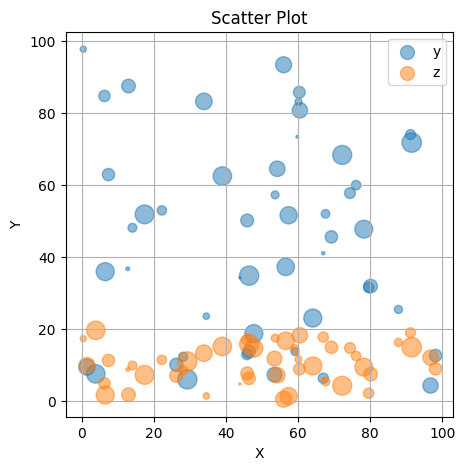

In [64]:
using PyPlot

#  Create Data  #
x = 100*rand(50)
y = 100*rand(50)
z = 20 * rand(50)
areas = 200*rand(50)

#  Scatter Plot  #
fig = figure("pyplot_scatterplot",figsize=(5,5))
ax = PyPlot.axes()
ax.scatter(x,y,s=areas,alpha=0.5, label="y")
ax.scatter(x,z,s=areas,alpha=0.5, label="z")

PyPlot.title("Scatter Plot")
xlabel("X")
ylabel("Y")
legend()
grid("on")